Some insights to explore:
 - sales channel -> quantity by sc, total sales by sc,
 - country -> quantity by country, total sales by country, 
 - category -> quantity by category, total sales by category,
 - shipment provider -> total shipping cost by sp, avg shipping cost by sp,
 - returned products -> total sales of returned prods, most returned prods by category, by country, most returned prods by category in each country
 - % of returned amount, % of sales amount by returned prods
 - order priority -> distribution
 - ware house location -> distribution
 - payment method -> distribution
 - sucessful products -> sales amount by category,
 - there are negative total sales values -> eda on it
 - timeseries analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('online_sales_cleaned.csv')

SalesChannel
Online      25051
In-store    24731
Name: count, dtype: int64


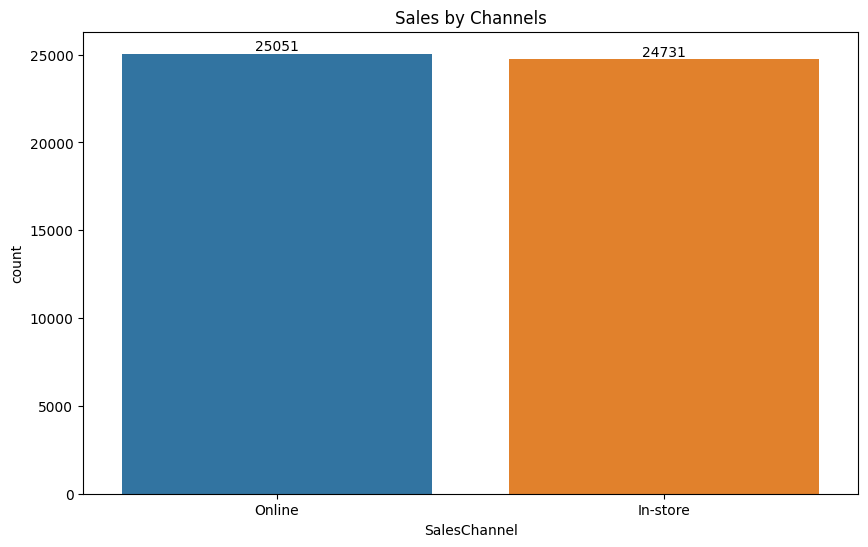

In [3]:
sale_channel = df['SalesChannel'].value_counts()
print(sale_channel)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='SalesChannel', order=sale_channel.index)
plt.title('Sales by Channels')

for i, v in enumerate(sale_channel):
    plt.text(i, v, str(v), ha='center', va='bottom')

SalesChannel
In-store    31212224.66
Online      31510839.55
Name: SalesAmount, dtype: float64


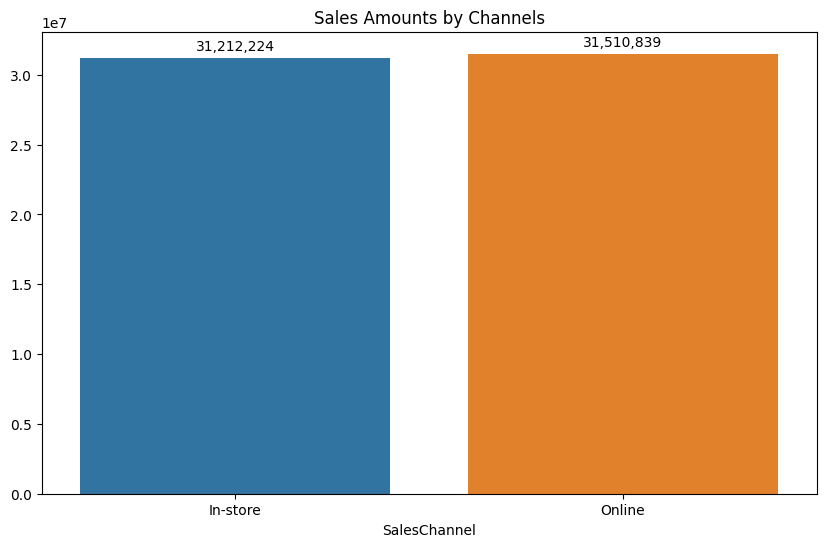

In [4]:
total_sales_by_channel = df.groupby('SalesChannel')['SalesAmount'].sum()
print(total_sales_by_channel)

plt.figure(figsize=(10, 6))
sns.barplot(x=total_sales_by_channel.index, y=total_sales_by_channel.values)
plt.title('Sales Amounts by Channels')

for i, v in enumerate(total_sales_by_channel):
    plt.text(i, v + 0.01 * max(total_sales_by_channel), f"{int(v):,}", ha='center', va='bottom', fontsize=10)

Country
Australia         4110
Belgium           4170
France            4230
Germany           4182
Italy             4048
Netherlands       4173
Norway            4157
Portugal          4163
Spain             4100
Sweden            4211
United Kingdom    4180
United States     4058
Name: count, dtype: int64


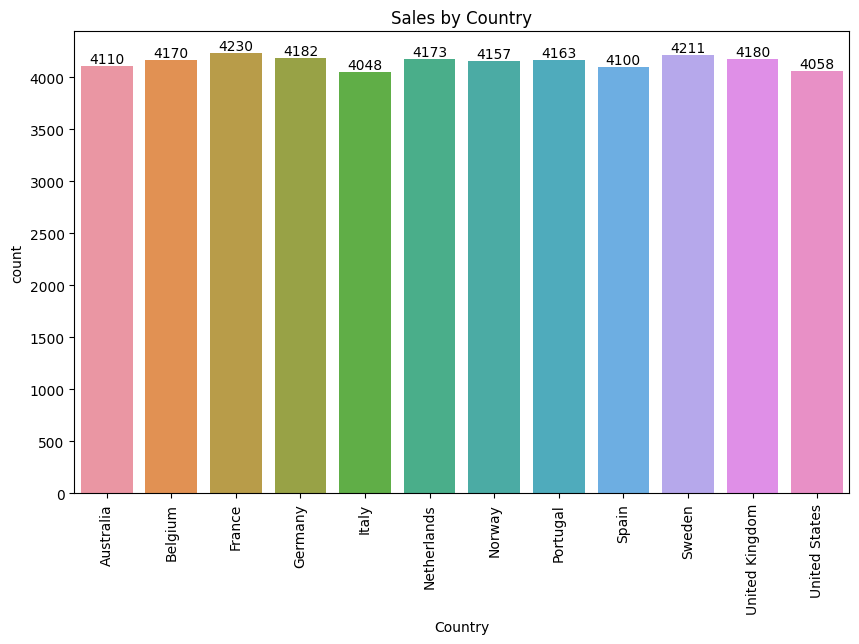

In [5]:
country = df['Country'].value_counts().sort_index()
print(country)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Country', order=country.index)
plt.title('Sales by Country')
plt.xticks(rotation=90)

for i, v in enumerate(country):
    plt.text(i, v, str(v), ha='center', va='bottom')

Country
Australia         5099336.58
Belgium           5350940.70
France            5254935.09
Germany           5315495.14
Italy             5125169.05
Netherlands       5121244.32
Norway            5156727.77
Portugal          5221345.04
Spain             5193759.24
Sweden            5290160.86
United Kingdom    5330327.69
United States     5263622.73
Name: SalesAmount, dtype: float64


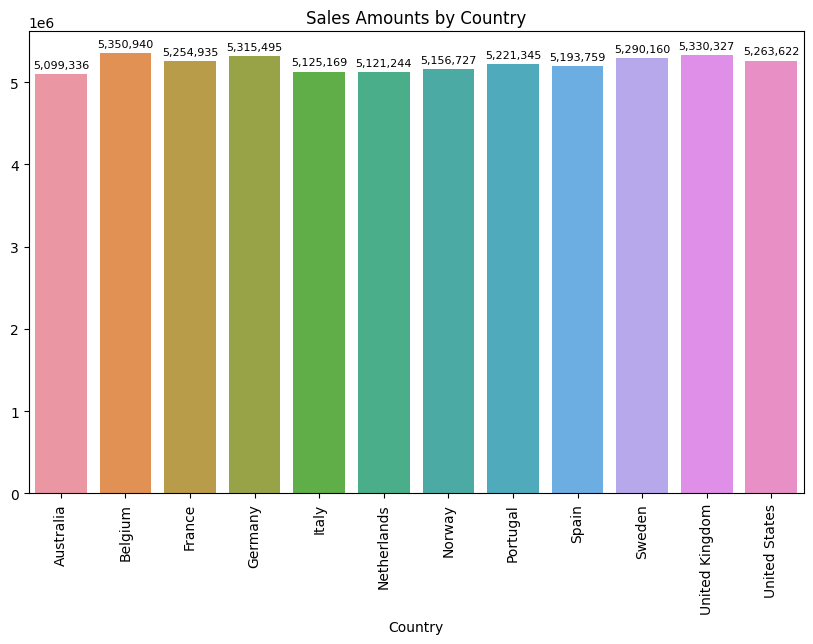

In [6]:
sales_amounts_by_country = df.groupby('Country')['SalesAmount'].sum()
print(sales_amounts_by_country)

plt.figure(figsize=(10, 6))
sns.barplot(x=sales_amounts_by_country.index, y=sales_amounts_by_country.values, order=sales_amounts_by_country.index)
plt.title('Sales Amounts by Country')
plt.xticks(rotation=90)

for i, v in enumerate(sales_amounts_by_country):
    plt.text(i, v + 0.01 * max(sales_amounts_by_country), f"{int(v):,}", ha='center', va='bottom', fontsize=8)

Country
Belgium           5350940.70
United Kingdom    5330327.69
Germany           5315495.14
Name: SalesAmount, dtype: float64


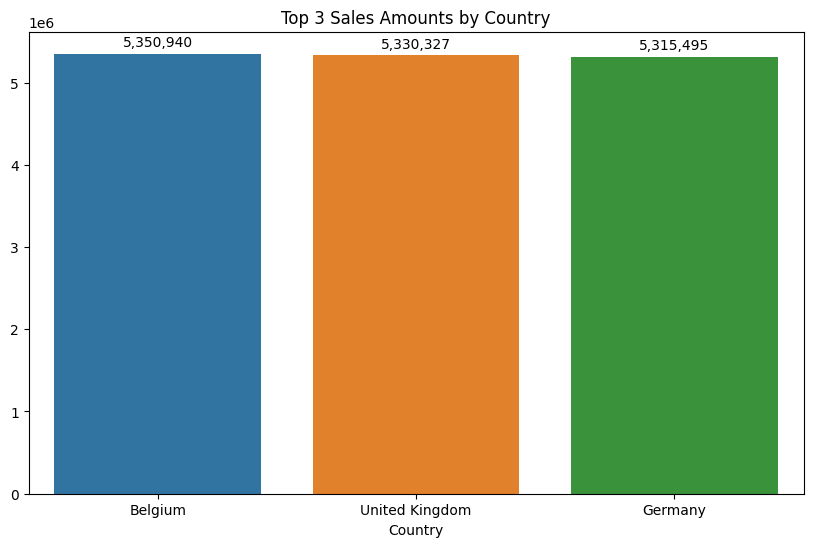

In [7]:
top_3_sales_by_country = sales_amounts_by_country.nlargest(3)
print(top_3_sales_by_country)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_3_sales_by_country.index, y=top_3_sales_by_country.values)
plt.title('Top 3 Sales Amounts by Country')

for i, v in enumerate(top_3_sales_by_country):
    plt.text(i, v + 0.01 * max(top_3_sales_by_country), f"{int(v):,}", ha='center', va='bottom', fontsize=10)

Category
Accessories     9975
Apparel         9864
Electronics     9931
Furniture      10084
Stationery      9928
Name: count, dtype: int64


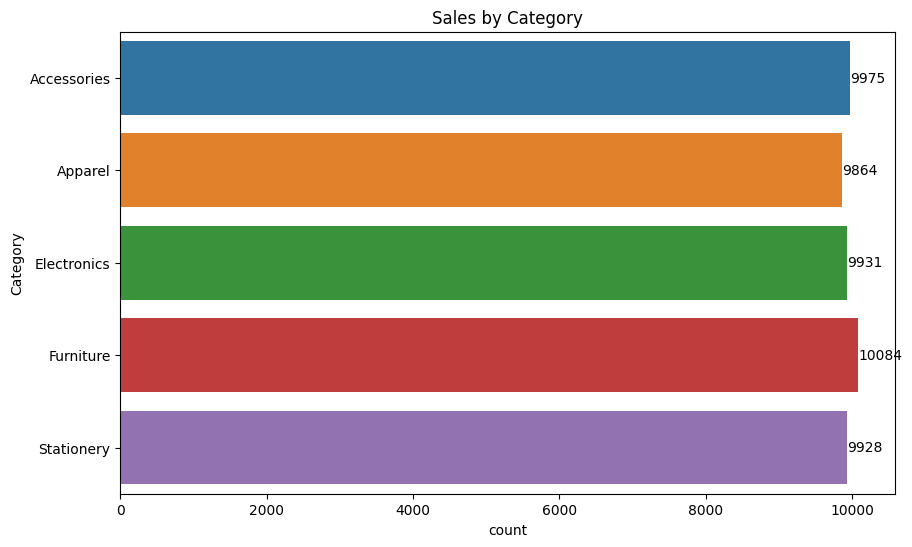

In [8]:
category =  df['Category'].value_counts().sort_index()
print(category)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Category', order=category.index)
plt.title('Sales by Category')

for i, v in enumerate(category):
    plt.text(v, i, str(v), ha='left', va='center')

Category
Accessories    12600055.80
Apparel        12472129.84
Electronics    12502615.15
Furniture      12692481.93
Stationery     12455781.49
Name: SalesAmount, dtype: float64


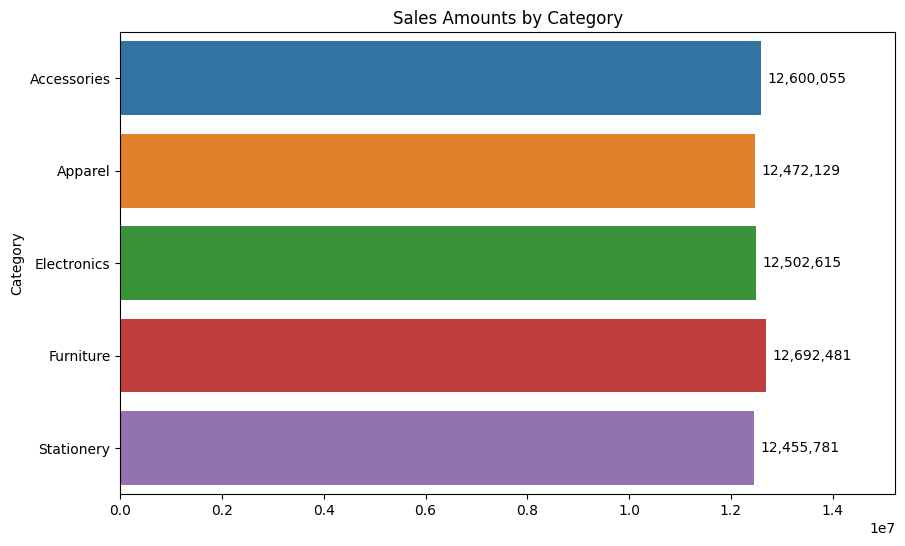

In [9]:
sales_amount_by_category = df.groupby('Category')['SalesAmount'].sum()
print(sales_amount_by_category)

plt.figure(figsize=(10, 6))
sns.barplot(x=sales_amount_by_category.values, y=sales_amount_by_category.index, order=category.index)
plt.title('Sales Amounts by Category')
plt.xlim(0, sales_amount_by_category.max() * 1.2)

for i, v in enumerate(sales_amount_by_category):
    plt.text(v + 0.01 * sales_amount_by_category.max(), i, f"{int(v):,}", ha='left', va='center', fontsize=10)

PaymentMethod
Bank Transfer    16747
Credit Card      16530
paypall          16505
Name: count, dtype: int64


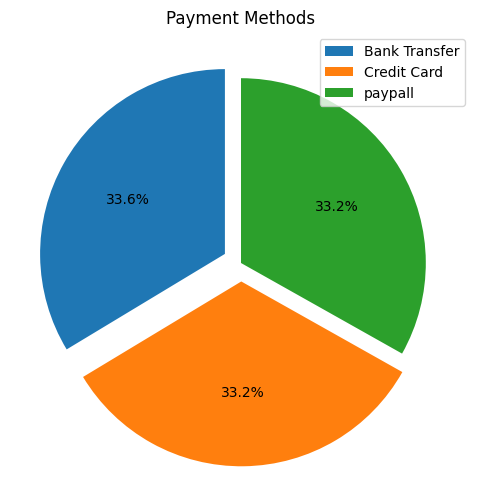

In [10]:
payment = df['PaymentMethod'].value_counts().sort_index()
print(payment)

plt.figure(figsize=(10, 6))
plt.pie(payment, autopct='%1.1f%%', startangle=90, explode=(0.1, 0.1, 0))
plt.title('Payment Methods')
plt.legend(labels=payment.index)

WarehouseLocation
Amsterdam       9458
Berlin          9210
London          9230
No Warehouse    3485
Paris           9173
Rome            9226
Name: count, dtype: int64


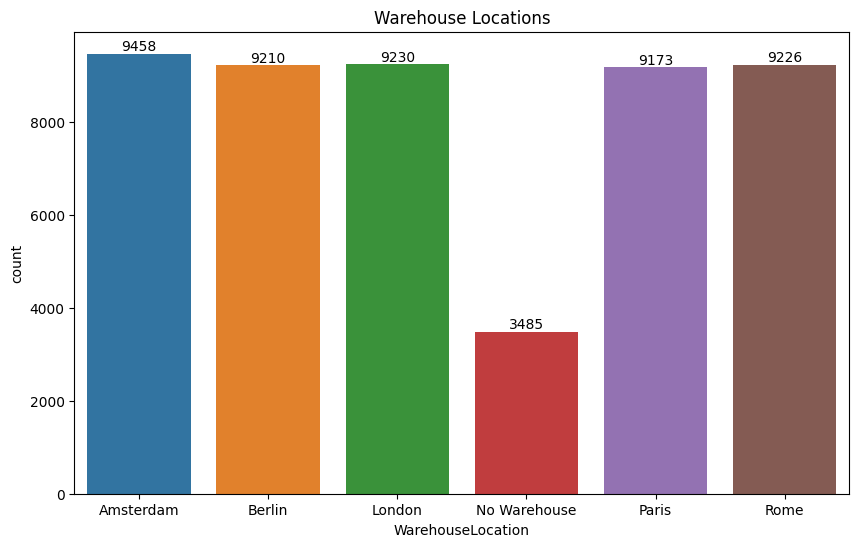

In [11]:
warehouse = df['WarehouseLocation'].value_counts().sort_index()
print(warehouse)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='WarehouseLocation', order=warehouse.index)
plt.title('Warehouse Locations')

for i, v in enumerate(warehouse):
    plt.text(i, v, str(v), ha='center', va='bottom')

OrderPriority
High      16562
Low       16542
Medium    16678
Name: count, dtype: int64


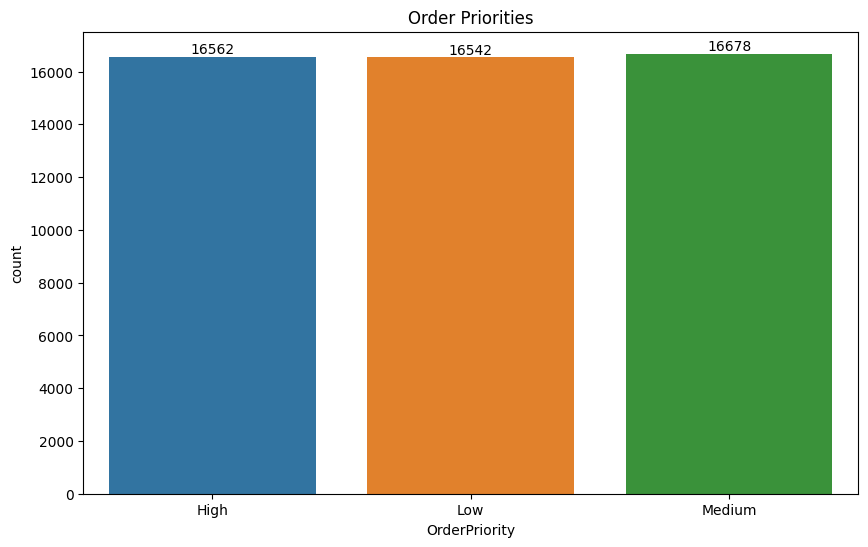

In [12]:
order_priority = df['OrderPriority'].value_counts().sort_index()
print(order_priority)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='OrderPriority', order=order_priority.index)
plt.title('Order Priorities')

for i, v in enumerate(order_priority):
    plt.text(i, v, str(v), ha='center', va='bottom')

ShipmentProvider
DHL           12425
FedEx         12501
Royal Mail    12423
UPS           12433
Name: count, dtype: int64


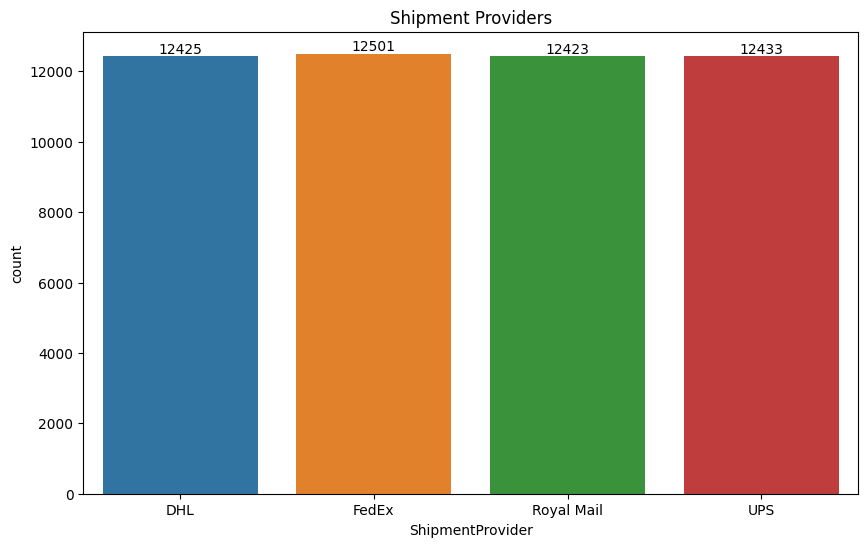

In [13]:
shipment = df['ShipmentProvider'].value_counts().sort_index()
print(shipment)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ShipmentProvider', order=shipment.index)
plt.title('Shipment Providers')

for i, v in enumerate(shipment):
    plt.text(i, v, str(v), ha='center', va='bottom')

ShipmentProvider
DHL           205760.27
FedEx         208815.78
Royal Mail    207502.29
UPS           205290.43
Name: ShippingCost, dtype: float64


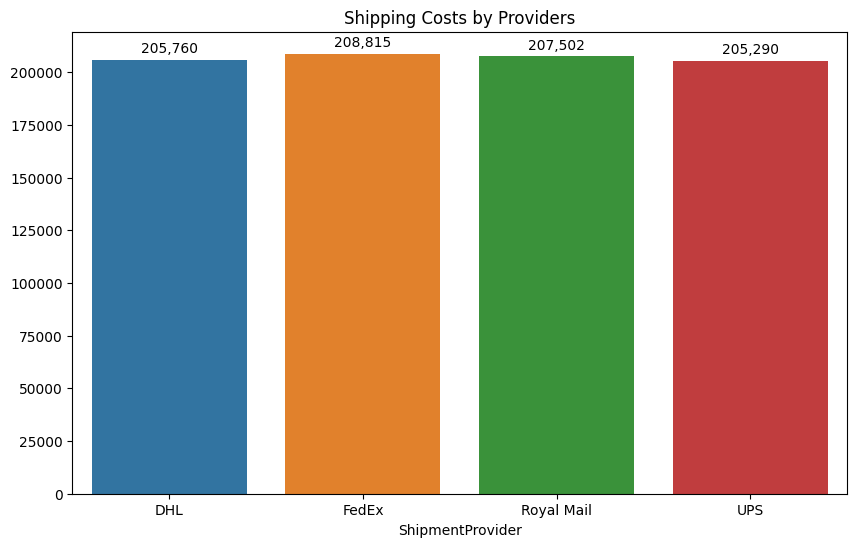

In [14]:
shipment_cost = df.groupby('ShipmentProvider')['ShippingCost'].sum().sort_index()
print(shipment_cost)

plt.figure(figsize=(10, 6))
sns.barplot(x=shipment_cost.index, y=shipment_cost.values, order=shipment.index)
plt.title('Shipping Costs by Providers')

for i, v in enumerate(shipment_cost):
    plt.text(i, v + 0.01 * max(shipment_cost), f"{int(v):,}", ha='center', va='bottom', fontsize=10)

ShipmentProvider
DHL           16.560183
FedEx         16.703926
Royal Mail    16.703074
UPS           16.511737
Name: ShippingCost, dtype: float64


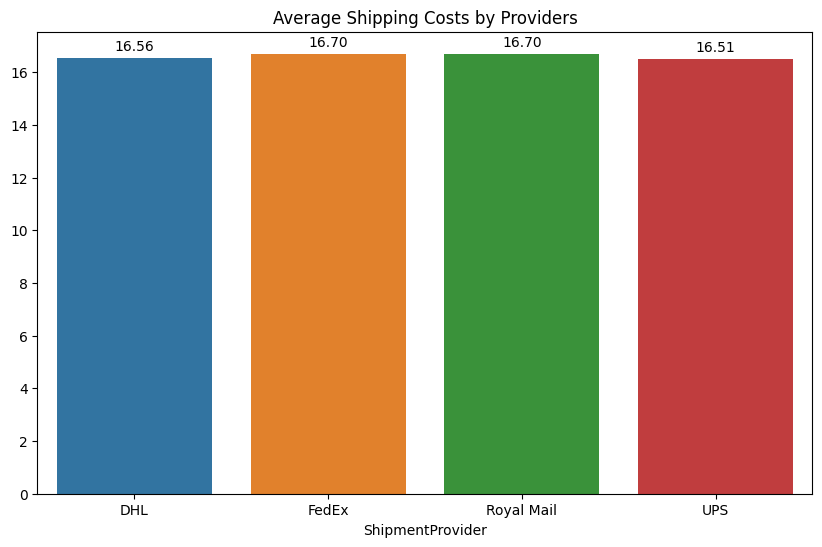

In [15]:
avg_shipment_cost = df.groupby('ShipmentProvider')['ShippingCost'].mean().sort_index()
print(avg_shipment_cost)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_shipment_cost.index, y=avg_shipment_cost.values, order=shipment.index)
plt.title('Average Shipping Costs by Providers')

for i, v in enumerate(avg_shipment_cost):
    plt.text(i, v + 0.01 * max(avg_shipment_cost), f"{v:.2f}", ha='center', va='bottom', fontsize=10)

ReturnStatus
Not Returned    44888
Returned         4894
Name: count, dtype: int64


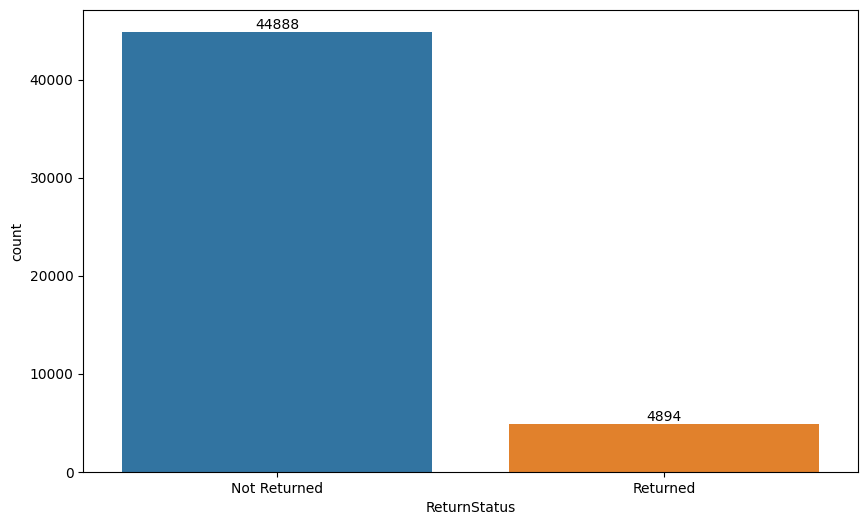

In [16]:
return_status = df['ReturnStatus'].value_counts()
print(return_status)

return_status = df['ReturnStatus'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ReturnStatus', order=return_status.index)

for i, v in enumerate(return_status):
    plt.text(i, v, str(v), ha='center', va='bottom')

ReturnStatus
Not Returned    56635031.21
Returned         6088033.00
Name: SalesAmount, dtype: float64


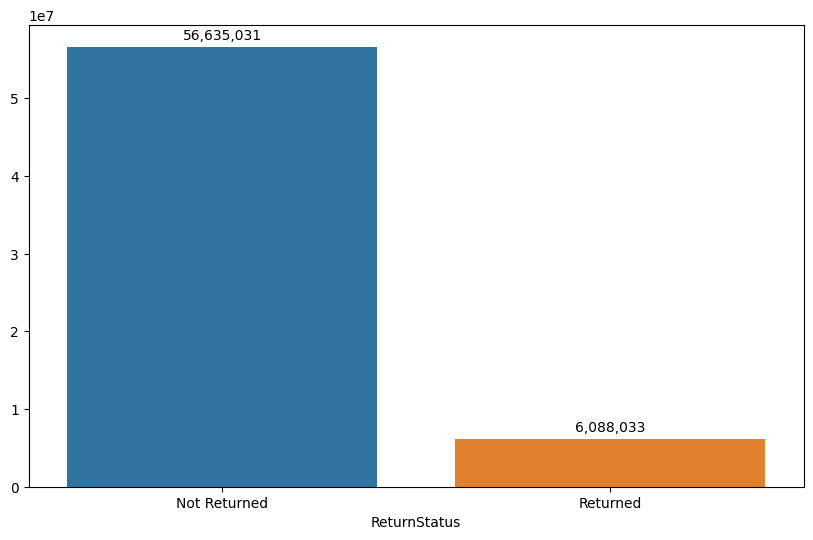

In [17]:
sales_amount_by_return_status = df.groupby('ReturnStatus')['SalesAmount'].sum()
print(sales_amount_by_return_status)

plt.figure(figsize=(10, 6))
sns.barplot(x=sales_amount_by_return_status.index, y=sales_amount_by_return_status.values)

for i, v in enumerate(sales_amount_by_return_status):
    plt.text(i, v + 0.01 * max(sales_amount_by_return_status), f"{int(v):,}", ha='center', va='bottom', fontsize=10)

In [18]:
returned_products_df = df[df['ReturnStatus'] == 'Returned']
returned_products_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Discount,PaymentMethod,ShippingCost,...,ShipmentProvider,WarehouseLocation,OrderPriority,SalesAmount,TotalDiscounts,TotalSales,Year,Quarter,Month,Day
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00:00,29.11,Germany,0.35,Bank Transfer,23.03,...,UPS,Berlin,High,1426.39,499.2365,950.1835,2020,1,1,1
10,621430,SKU_1144,Notebook,49,2020-01-01 10:00:00,87.56,United Kingdom,0.19,paypall,9.83,...,UPS,Paris,Medium,4290.44,815.1836,3485.0864,2020,1,1,1
19,887201,SKU_1119,USB Cable,46,2020-01-01 19:00:00,27.03,Spain,0.26,Credit Card,23.80,...,UPS,London,Medium,1243.38,323.2788,943.9012,2020,1,1,1
20,421879,SKU_1578,Wall Clock,43,2020-01-01 20:00:00,77.17,Norway,0.30,Bank Transfer,24.77,...,FedEx,Berlin,Low,3318.31,995.4930,2347.5870,2020,1,1,1
33,586232,SKU_1722,Wall Clock,14,2020-01-02 09:00:00,10.32,France,0.01,Credit Card,28.90,...,DHL,Rome,Low,144.48,1.4448,171.9352,2020,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49751,352868,SKU_1131,Desk Lamp,17,2025-09-03 23:00:00,97.76,Australia,0.02,Credit Card,6.38,...,DHL,Amsterdam,Medium,1661.92,33.2384,1635.0616,2025,3,9,3
49757,170681,SKU_1613,Blue Pen,3,2025-09-04 05:00:00,94.36,Germany,0.32,paypall,9.33,...,FedEx,Paris,Medium,283.08,90.5856,201.8244,2025,3,9,4
49769,701257,SKU_1092,Office Chair,19,2025-09-04 17:00:00,81.91,Belgium,0.48,Bank Transfer,13.45,...,DHL,Paris,Medium,1556.29,747.0192,822.7208,2025,3,9,4
49775,405597,SKU_1140,Backpack,37,2025-09-04 23:00:00,66.64,Italy,0.35,paypall,19.93,...,UPS,Rome,Low,2465.68,862.9880,1622.6220,2025,3,9,4


In [19]:
sales_amount_by_returned_products = returned_products_df['SalesAmount'].sum()
print(f'sales amount by returned products: {sales_amount_by_returned_products}')

percentage_of_returned_products = len(returned_products_df) / len(df) * 100
print(f'{percentage_of_returned_products:.2f}% of returned products')

percentage_sa_of_returned_products = sales_amount_by_returned_products / df['SalesAmount'].sum() * 100
print(f'{percentage_sa_of_returned_products:.2f}% of sales amount by returned products')

sales amount by returned products: 6088033.0
9.83% of returned products
9.71% of sales amount by returned products


Category
Accessories     965
Apparel         963
Electronics     977
Furniture      1004
Stationery      985
Name: count, dtype: int64


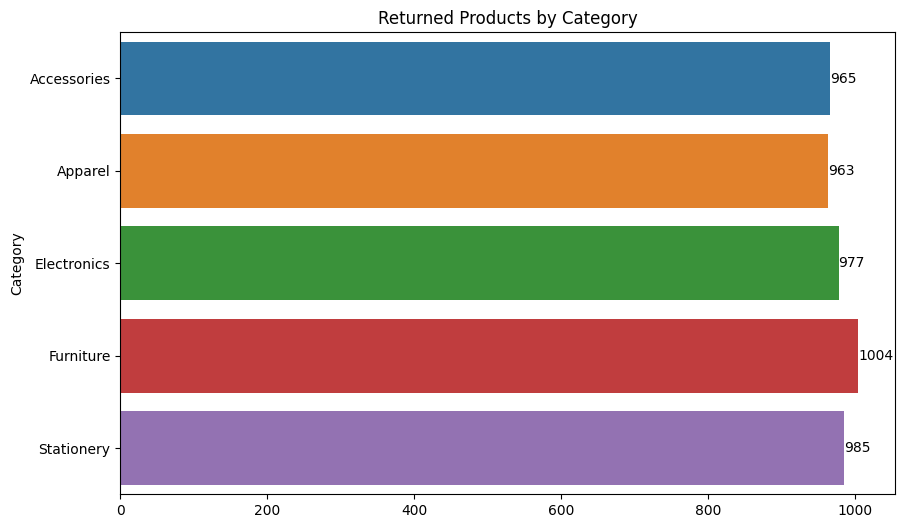

In [20]:
return_products_by_category = returned_products_df['Category'].value_counts().sort_index()
print(return_products_by_category)

plt.figure(figsize=(10, 6))
sns.barplot(x=return_products_by_category.values, y=return_products_by_category.index, order=return_products_by_category.index, orient='h')
plt.title('Returned Products by Category')

for i, v in enumerate(return_products_by_category):
    plt.text(v, i, str(v), ha='left', va='center')

Category
Accessories    24129
Apparel        24557
Electronics    23627
Furniture      25287
Stationery     24669
Name: Quantity, dtype: int64


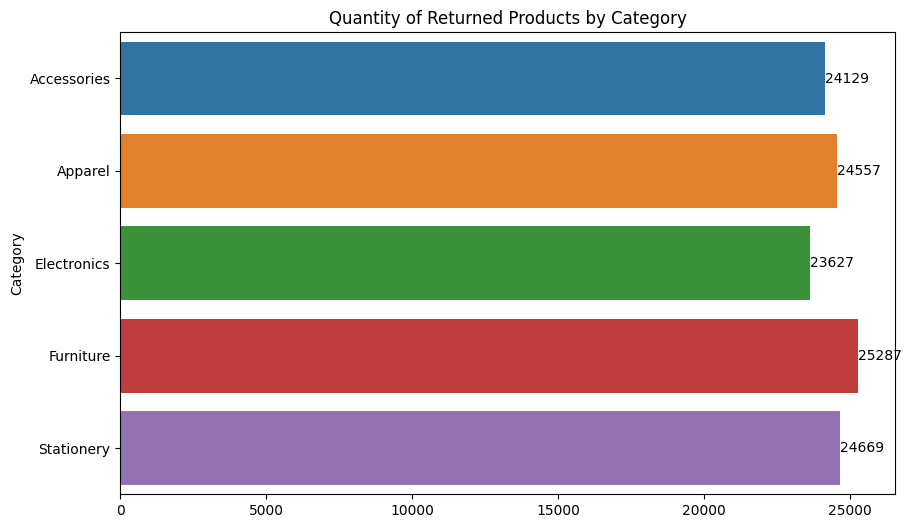

In [21]:
quantity_of_returned_products_by_category = returned_products_df.groupby('Category')['Quantity'].sum()
print(quantity_of_returned_products_by_category)

plt.figure(figsize=(10, 6))
sns.barplot(x=quantity_of_returned_products_by_category.values, y=quantity_of_returned_products_by_category.index, order=return_products_by_category.index, orient='h')
plt.title('Quantity of Returned Products by Category')

for i, v in enumerate(quantity_of_returned_products_by_category):
    plt.text(v, i, str(v), ha='left', va='center')

Country
Australia         10694
Belgium           10429
France            10135
Germany           11270
Italy             10260
Netherlands        9765
Norway             9673
Portugal           9836
Spain              9338
Sweden            10003
United Kingdom    10274
United States     10592
Name: Quantity, dtype: int64


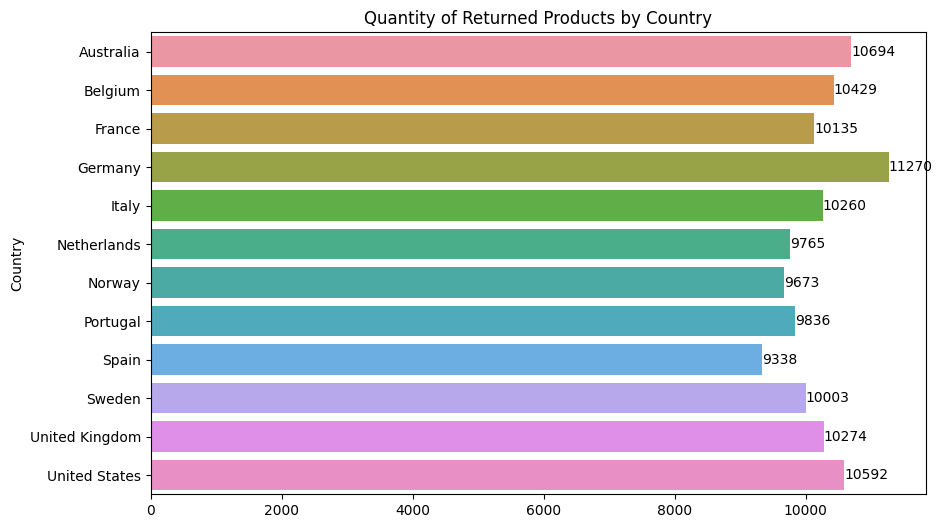

In [22]:
quantity_of_returned_products_by_country = returned_products_df.groupby('Country')['Quantity'].sum()
print(quantity_of_returned_products_by_country)

plt.figure(figsize=(10, 6))
sns.barplot(x=quantity_of_returned_products_by_country.values, y=quantity_of_returned_products_by_country.index, orient='h')
plt.title('Quantity of Returned Products by Country')

for i, v in enumerate(quantity_of_returned_products_by_country):
    plt.text(v, i, str(v), ha='left', va='center')

In [23]:
returned_cateory_in_each_country = returned_products_df.groupby(['Country', 'Category'])['Quantity'].sum().reset_index()
returned_cateory_in_each_country

,Country,Category,Quantity
0,Australia,Accessories,2141
1,Australia,Apparel,1919
2,Australia,Electronics,2277
3,Australia,Furniture,2070
4,Australia,Stationery,2287
5,Belgium,Accessories,1902
6,Belgium,Apparel,2077
7,Belgium,Electronics,1973
8,Belgium,Furniture,2441
9,Belgium,Stationery,2036


In [24]:
most_returned_cateory_in_each_country = returned_cateory_in_each_country.groupby('Country').apply(lambda x: x.nlargest(1, 'Quantity')).reset_index(drop=True)
most_returned_cateory_in_each_country

C:\Users\Admin\AppData\Local\Temp\ipykernel_10532\2897887535.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  most_returned_cateory_in_each_country = returned_cateory_in_each_country.groupby('Country').apply(lambda x: x.nlargest(1, 'Quantity')).reset_index(drop=True)


,Country,Category,Quantity
0,Australia,Stationery,2287
1,Belgium,Furniture,2441
2,France,Electronics,2514
3,Germany,Apparel,2569
4,Italy,Furniture,2498
5,Netherlands,Furniture,2299
6,Norway,Stationery,2239
7,Portugal,Apparel,2094
8,Spain,Furniture,2012
9,Sweden,Furniture,2297


In [25]:
successful_products_df = df[df['ReturnStatus'] != 'Returned']
successful_products_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Discount,PaymentMethod,ShippingCost,...,ShipmentProvider,WarehouseLocation,OrderPriority,SalesAmount,TotalDiscounts,TotalSales,Year,Quarter,Month,Day
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00:00,1.71,Australia,0.470000,Bank Transfer,10.79,...,UPS,London,Medium,64.98,30.540600,45.229400,2020,1,1,1
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00:00,41.25,Spain,0.190000,paypall,9.51,...,UPS,Rome,Medium,742.50,141.075000,610.935000,2020,1,1,1
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00:00,76.68,Netherlands,0.140000,paypall,11.08,...,Royal Mail,Rome,Low,1073.52,150.292800,934.307200,2020,1,1,1
4,359178,SKU_1386,USB Cable,30,2020-01-01 04:00:00,68.11,United Kingdom,1.501433,Bank Transfer,0.00,...,FedEx,No Warehouse,Medium,2043.30,3067.878137,-1024.578137,2020,1,1,1
5,744167,SKU_1006,Office Chair,47,2020-01-01 05:00:00,70.16,Sweden,0.480000,Credit Card,13.98,...,DHL,London,Medium,3297.52,1582.809600,1728.690400,2020,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49776,524453,SKU_1316,Office Chair,43,2025-09-05 00:00:00,84.19,United Kingdom,0.250000,Credit Card,21.38,...,DHL,Amsterdam,Low,3620.17,905.042500,2736.507500,2025,3,9,5
49778,296698,SKU_1930,USB Cable,7,2025-09-05 02:00:00,51.74,United States,0.230000,Bank Transfer,23.55,...,FedEx,Amsterdam,Low,362.18,83.301400,302.428600,2025,3,9,5
49779,177622,SKU_1766,Office Chair,43,2025-09-05 03:00:00,85.25,Portugal,0.200000,Bank Transfer,16.26,...,FedEx,London,High,3665.75,733.150000,2948.860000,2025,3,9,5
49780,701213,SKU_1602,Notebook,48,2025-09-05 04:00:00,39.64,United Kingdom,0.310000,paypall,28.56,...,Royal Mail,London,Medium,1902.72,589.843200,1341.436800,2025,3,9,5


In [26]:
sales_amount_by_successful_products = successful_products_df['SalesAmount'].sum()
print(f'sales amount of sucessful products: {sales_amount_by_successful_products}')

percentage_of_successful_products = len(successful_products_df) / len(df) * 100
print(f'{percentage_of_successful_products:.2f}% of successful products')

percentage_sa_of_successful_products = sales_amount_by_successful_products / df['SalesAmount'].sum() * 100
print(f'{percentage_sa_of_successful_products:.2f}% of sales amount by successful products')

sales amount of sucessful products: 56635031.21000001
90.17% of successful products
90.29% of sales amount by successful products


In [27]:
negative_total_sales_df = df[df['TotalSales'] < 0]
negative_total_sales_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Discount,PaymentMethod,ShippingCost,...,ShipmentProvider,WarehouseLocation,OrderPriority,SalesAmount,TotalDiscounts,TotalSales,Year,Quarter,Month,Day
4,359178,SKU_1386,USB Cable,30,2020-01-01 04:00:00,68.11,United Kingdom,1.501433,Bank Transfer,0.0,...,FedEx,No Warehouse,Medium,2043.30,3067.878137,-1024.578137,2020,1,1,1
147,747972,SKU_1514,Desk Lamp,26,2020-01-07 03:00:00,72.33,Netherlands,1.972087,paypall,0.0,...,Royal Mail,No Warehouse,Low,1880.58,3708.666502,-1828.086502,2020,1,1,7
167,318969,SKU_1115,Desk Lamp,19,2020-01-07 23:00:00,3.61,Italy,1.052254,Credit Card,0.0,...,UPS,No Warehouse,High,68.59,72.174124,-3.584124,2020,1,1,7
199,867595,SKU_1343,White Mug,2,2020-01-09 07:00:00,96.08,Portugal,1.702088,Bank Transfer,0.0,...,FedEx,No Warehouse,Low,192.16,327.073147,-134.913147,2020,1,1,9
262,937291,SKU_1936,Wall Clock,16,2020-01-11 22:00:00,73.60,Germany,1.535440,Credit Card,0.0,...,DHL,No Warehouse,Medium,1177.60,1808.134092,-630.534092,2020,1,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49622,733594,SKU_1811,Notebook,50,2025-08-29 14:00:00,32.91,United States,1.608233,paypall,0.0,...,Royal Mail,No Warehouse,Medium,1645.50,2646.346967,-1000.846967,2025,3,8,29
49691,553510,SKU_1943,T-shirt,4,2025-09-01 11:00:00,74.57,France,1.306613,Credit Card,0.0,...,Royal Mail,No Warehouse,Low,298.28,389.736507,-91.456507,2025,3,9,1
49695,855821,SKU_1500,Wireless Mouse,11,2025-09-01 15:00:00,18.88,Portugal,1.569082,Bank Transfer,0.0,...,FedEx,No Warehouse,Low,207.68,325.866852,-118.186852,2025,3,9,1
49718,745888,SKU_1224,T-shirt,2,2025-09-02 14:00:00,84.25,United States,1.420665,Bank Transfer,0.0,...,Royal Mail,No Warehouse,Medium,168.50,239.381985,-70.881985,2025,3,9,2


In [28]:
positive_total_sales_df = df[df['TotalSales'] >= 0]
positive_total_sales_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Discount,PaymentMethod,ShippingCost,...,ShipmentProvider,WarehouseLocation,OrderPriority,SalesAmount,TotalDiscounts,TotalSales,Year,Quarter,Month,Day
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00:00,1.71,Australia,0.47,Bank Transfer,10.79,...,UPS,London,Medium,64.98,30.5406,45.2294,2020,1,1,1
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00:00,41.25,Spain,0.19,paypall,9.51,...,UPS,Rome,Medium,742.50,141.0750,610.9350,2020,1,1,1
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00:00,29.11,Germany,0.35,Bank Transfer,23.03,...,UPS,Berlin,High,1426.39,499.2365,950.1835,2020,1,1,1
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00:00,76.68,Netherlands,0.14,paypall,11.08,...,Royal Mail,Rome,Low,1073.52,150.2928,934.3072,2020,1,1,1
5,744167,SKU_1006,Office Chair,47,2020-01-01 05:00:00,70.16,Sweden,0.48,Credit Card,13.98,...,DHL,London,Medium,3297.52,1582.8096,1728.6904,2020,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49777,354083,SKU_1562,Blue Pen,25,2025-09-05 01:00:00,70.92,Spain,0.20,Credit Card,8.96,...,UPS,Berlin,Medium,1773.00,354.6000,1427.3600,2025,3,9,5
49778,296698,SKU_1930,USB Cable,7,2025-09-05 02:00:00,51.74,United States,0.23,Bank Transfer,23.55,...,FedEx,Amsterdam,Low,362.18,83.3014,302.4286,2025,3,9,5
49779,177622,SKU_1766,Office Chair,43,2025-09-05 03:00:00,85.25,Portugal,0.20,Bank Transfer,16.26,...,FedEx,London,High,3665.75,733.1500,2948.8600,2025,3,9,5
49780,701213,SKU_1602,Notebook,48,2025-09-05 04:00:00,39.64,United Kingdom,0.31,paypall,28.56,...,Royal Mail,London,Medium,1902.72,589.8432,1341.4368,2025,3,9,5


In [29]:
sum_total_sales_practice = df['TotalSales'].sum()
print(f'sum of total sales practice: {sum_total_sales_practice}')

sum_negative_total_sales = abs(negative_total_sales_df['TotalSales'].sum())
print(f'sum of negative total sales: {sum_negative_total_sales}')

sum_positive_total_sales = positive_total_sales_df['TotalSales'].sum()
print(f'sum of positive total sales: {sum_positive_total_sales}')

sum_total_sales = sum_negative_total_sales + sum_positive_total_sales
print(f'sum of total sales: {sum_total_sales}')

percentage_of_negative_total_sales = sum_negative_total_sales / sum_total_sales * 100
print(f'percentage of negative total sales: {percentage_of_negative_total_sales:.2f}%')

percentage_of_positive_total_sales = sum_positive_total_sales / sum_total_sales * 100
print(f'percentage of positive total sales: {percentage_of_positive_total_sales:.2f}%')

diff_total_sales =  sum_total_sales - sum_total_sales_practice 
print(f'difference of total sales: {diff_total_sales}')

diff_percentage = diff_total_sales / sum_total_sales_practice * 100
print(f'difference percentage: {diff_percentage:.2f}%')

sum of total sales practice: 46268276.91865283
sum of negative total sales: 645505.1603471711
sum of positive total sales: 46913782.079
sum of total sales: 47559287.239347175
percentage of negative total sales: 1.36%
percentage of positive total sales: 98.64%
difference of total sales: 1291010.3206943423
difference percentage: 2.79%


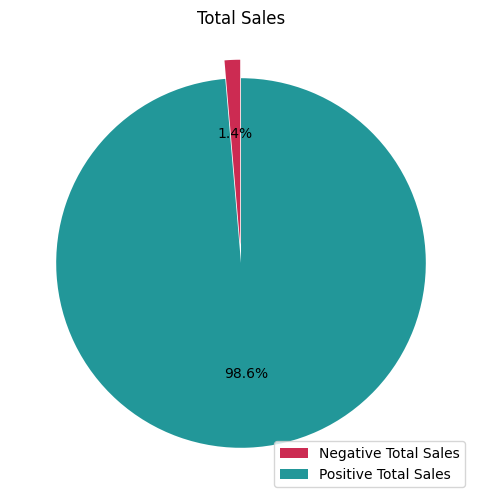

In [30]:
plt.figure(figsize=(10, 6))
plt.pie([sum_negative_total_sales, sum_positive_total_sales], autopct='%1.1f%%', startangle=90, explode=(0.1, 0), colors=['#CC2B52','#229799'])
plt.title('Total Sales')
plt.legend(labels=['Negative Total Sales', 'Positive Total Sales'])

In [31]:
negative_total_sales_df['WarehouseLocation'].value_counts()

WarehouseLocation
No Warehouse    996
Name: count, dtype: int64

SalesChannel
In-store    312862.663328
Online      332642.497019
Name: TotalSales, dtype: float64


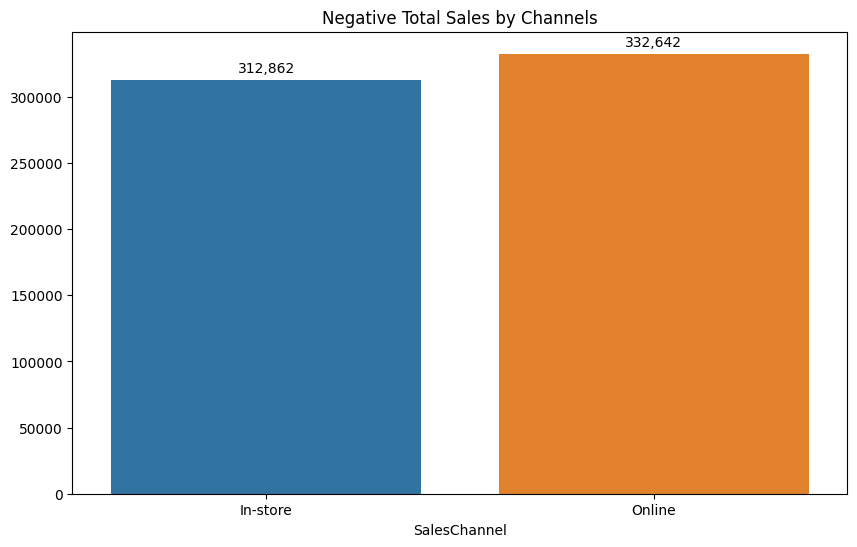

In [32]:
negative_total_sales_by_channels = abs(negative_total_sales_df.groupby('SalesChannel')['TotalSales'].sum())
print(negative_total_sales_by_channels)

plt.figure(figsize=(10, 6))
sns.barplot(x=negative_total_sales_by_channels.index, y=negative_total_sales_by_channels.values)
plt.title('Negative Total Sales by Channels')

for i, v in enumerate(negative_total_sales_by_channels):
    plt.text(i, v + 0.01 * max(negative_total_sales_by_channels), f"{int(v):,}", ha='center', va='bottom', fontsize=10)

In [33]:
negative_total_sales_by_return_status =  abs(negative_total_sales_df.groupby('ReturnStatus')['TotalSales'].sum())
print(negative_total_sales_by_return_status)

ReturnStatus
Not Returned    590055.948041
Returned         55449.212306
Name: TotalSales, dtype: float64


    Month  Year  SalesAmount
0       1  2020    916092.00
1       1  2021    941220.19
2       1  2022    960046.22
3       1  2023    942004.81
4       1  2024    905044.10
..    ...   ...          ...
64     12  2020    915587.40
65     12  2021    946234.20
66     12  2022    910652.72
67     12  2023    991176.47
68     12  2024    926187.90

[69 rows x 3 columns]


C:\Users\Admin\AppData\Local\Temp\ipykernel_10532\106663700.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='TotalSales', hue='Year', data=df, ci=None, palette='tab10')
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you w

Text(0.5, 1.0, 'Sales by Month')

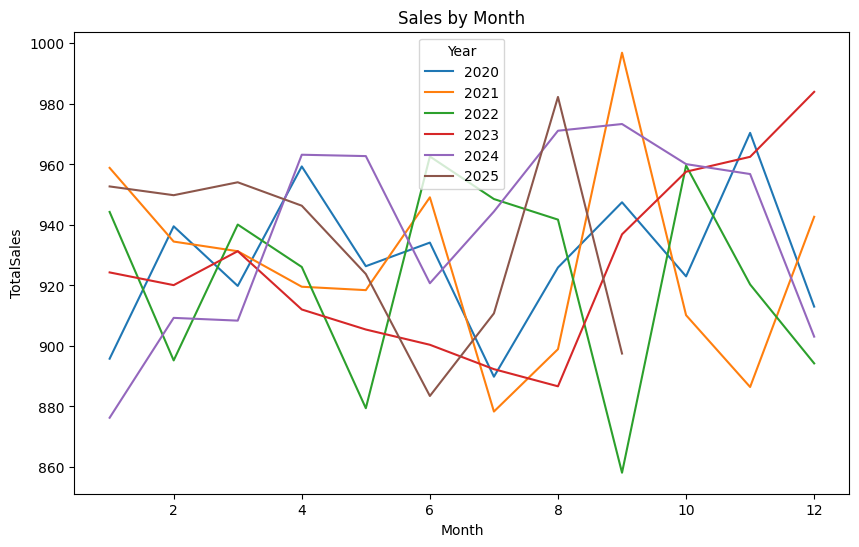

In [58]:
sales_by_month = df.groupby(['Month', 'Year'])['SalesAmount'].sum()
sales_by_month = pd.DataFrame(sales_by_month).reset_index()
print(sales_by_month)

plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='TotalSales', hue='Year', data=df, ci=None, palette='tab10')
plt.title('Sales by Month')

C:\Users\Admin\AppData\Local\Temp\ipykernel_10532\2686415248.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Day', y='TotalSales', hue='Year', data=df, ci=None, palette='tab10')
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you wi

Text(0.5, 1.0, 'Sales by Day')

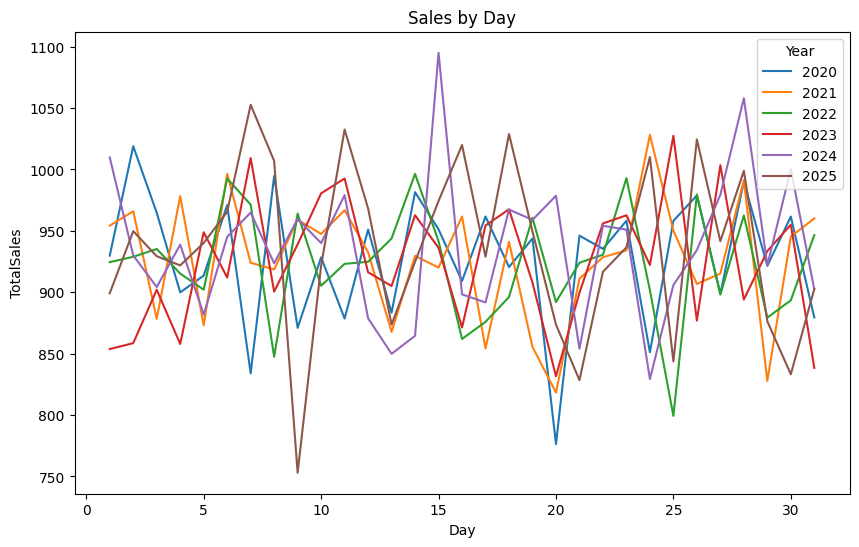

In [59]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Day', y='TotalSales', hue='Year', data=df, ci=None, palette='tab10')
plt.title('Sales by Day')